<a href="https://colab.research.google.com/github/sheng-999/visualisation_test/blob/upload/Retention_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 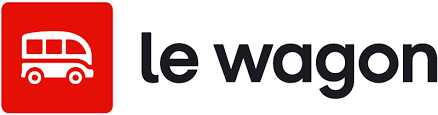

# Greenweez retention matrix

We will study covid's impact on Greenweez business with a focus on users' retention.

Covid lockdowns in France:
- from March 17 to May 11, 2020, i.e. 1 month and 25 days;
- from October 30 to December 15, 2020, i.e. 1 month and 15 days;
- from April 3 to May 3, 2021, i.e. 28 days.

## Turnover analysis

a) Load Greenweez orders by executing the following cell. It takes two minutes
of execution.

In [191]:
from google.colab import auth
import pandas as pd

# Will collect your credentials
auth.authenticate_user()

# Query Bigquery
query = "SELECT * FROM `data-analytics-bootcamp-363212.course30.gwz_orders` ORDER BY date_date"

df_orders = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")

In [192]:
df_orders = df_orders.copy()
df_orders.head()


,date_date,orders_id,customers_id,country,department,total_quantity,total_turnover
0,2019-01-01,571,560,FRANCE,77,52,92.71
1,2019-01-01,324,317,FRANCE,39,45,207.62
2,2019-01-01,458,451,FRANCE,68,41,95.33
3,2019-01-01,264,261,FRANCE,81,36,109.13
4,2019-01-01,87,87,FRANCE,54,46,167.21


b) Convert column `date_date` to datetime.

In [193]:
df_orders['date_date'] = pd.to_datetime(df_orders['date_date'], format = "%Y-%m-%d")

In [194]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035446 entries, 0 to 1035445
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date_date       1035446 non-null  datetime64[ns]
 1   orders_id       1035446 non-null  Int64         
 2   customers_id    1035446 non-null  Int64         
 3   country         1035446 non-null  object        
 4   department      1034713 non-null  object        
 5   total_quantity  1035446 non-null  Int64         
 6   total_turnover  1035446 non-null  float64       
dtypes: Int64(3), datetime64[ns](1), float64(1), object(2)
memory usage: 58.3+ MB


c) Set column `date_date` as index

In [195]:
df_orders = df_orders.set_index('date_date')

d) Calculate total turnover per year using `.resample()` method and store result in a `df_y_turnover` variable.

In [196]:
df_y_turnover = df_orders.resample('Y').sum()[['total_turnover']]
df_y_turnover

<ipython-input-196-7d3168343673>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,total_turnover
date_date,
2019-12-31,20990674.51
2020-12-31,30413594.84
2021-12-31,25917818.28


e) Calculate purcentage change 2020 and 2021 vs 2019.
What was the impact of Covid on the turnover?

In [197]:
df_y_turnover / df_y_turnover.loc['2019-12-31']-1

,total_turnover
date_date,
2019-12-31,0.00000
2020-12-31,0.44891
2021-12-31,0.23473




*   percentage change :
+44.8% for 2020 vs 2019 while +23.4% for 2021 vs 2019



f) Let's have a closer look if the turnover increase comes from additional users or from a bigger average order size

Using `resample()` function, create a new variable `df_m_turnover` which is total turnover per month.

In [198]:
# set resampl's value as m for monthly
df_m_turnover = df_orders.resample('m').sum()[['total_turnover']]
df_m_turnover

<ipython-input-198-cc4c9012d7b0>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,total_turnover
date_date,
2019-01-31,1802606.79
2019-02-28,1429057.06
2019-03-31,1786181.78
2019-04-30,1574534.95
2019-05-31,1803311.69
2019-06-30,1716243.97
2019-07-31,1720880.87
2019-08-31,1542003.62
2019-09-30,1883609.72


In [199]:
df_m_turnover.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2019-01-31 to 2021-12-31
Freq: M
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_turnover  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


g) Plot the result using Plotly express.
Can you identify a peak in this chart? Which month is it?

In [200]:
import plotly.express as px

In [201]:
fig_m = px.line(
    df_m_turnover,
    # if x is index, there's no need to set x value
    y = 'total_turnover',
    title = 'Turnover per Month 2019-2021',
)

fig_m.update_layout(
    xaxis_title = 'Year - Month: 2019 -2021',
    yaxis_title = 'Turnover'
)
fig_m.show()
# peak month is Martch 2020



*   Peak month for total turnover is Martch 2020



h) Plot a similar chart but showing the average turnover instead. What do you see?

In [202]:
# set resampl's value as m for monthly
df_m_avg_turnover = df_orders.resample('m').mean()[['total_turnover']]
df_m_avg_turnover

<ipython-input-202-807f225b3a8c>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,total_turnover
date_date,
2019-01-31,74.089880
2019-02-28,73.971585
2019-03-31,71.676636
2019-04-30,69.688189
2019-05-31,71.443750
2019-06-30,71.180954
2019-07-31,70.510566
2019-08-31,69.487793
2019-09-30,70.775145


In [203]:
fig_m = px.line(
    df_m_avg_turnover,
    y = 'total_turnover',
    title = 'Average Turnover per Month 2019-2021',
    # set label to precise the values as avg
    labels={'total_turnover': 'Avg Turnover'}
)

fig_m.update_layout(
    xaxis_title = 'Year - Month: 2019 -2021',
    yaxis_title = 'Average Turnover'
)
fig_m.show()
# peak month is Martch 2020



*   Peak month for average turnover is Martch 2020



i) Let's consider that a customer is new when a first order is placed.
What does this code do?


In [204]:
df_first_orders = df_orders.reset_index().groupby("customers_id", as_index=False).first()
df_first_orders

,customers_id,date_date,orders_id,country,department,total_quantity,total_turnover
0,1,2019-01-01,1,FRANCE,87,12,60.87
1,2,2019-01-01,2,FRANCE,45,8,70.42
2,3,2019-01-01,3,FRANCE,92,20,86.91
3,4,2019-01-01,4,FRANCE,04,32,81.48
4,5,2019-01-01,5,FRANCE,77,14,69.67
...,...,...,...,...,...,...,...
322326,336278,2021-12-31,1092204,FRANCE,77,9,54.85
322327,336279,2021-12-31,1092205,FRANCE,34,1,9.19
322328,336280,2021-12-31,1092208,FRANCE,66,8,37.78
322329,336281,2021-12-31,1092211,FRANCE,01,3,17.42


j) From df_first_orders, compute the number of new users per month. Store the result in a new variable df_new_customers.

Hint: `resample()` function has a "on" parameter...

In [205]:
df_new_customers = df_first_orders.resample('m', on='date_date').count()[['customers_id']]
df_new_customers

,customers_id
date_date,
2019-01-31,21980
2019-02-28,13241
2019-03-31,14044
2019-04-30,11359
2019-05-31,10953
2019-06-30,9541
2019-07-31,9527
2019-08-31,8550
2019-09-30,9485


k) Plot it in a graph with Plotly express. Which months have the most new customers ? Why do we have so many new users before Jul 2019? Is it correct?

In [206]:
fig_new_customers = px.bar(
    df_new_customers,
    y = 'customers_id',
    labels = {'date_date':'Month','customers_id':'No° Customers'}
)

fig_new_customers .update_layout(
    xaxis_title = 'Year - Month: 2019 -2021',
    yaxis_title = 'New Customer Number'
)
fig_new_customers.show()



*   The peak comes at the begginning of 2019. After July 2019, the number of new customers decreased




l) What can you conclude?



*   The peak comes at the begginning of 2019. After July 2019, the number of new customers decreased
*   Comparing with the increasing turnover in 2020, a great number of deal were made by loyal customers.

## Matrix retention

We will now study how long customers stay to have a better understanding of the previous analysis. We will do a cohort analysis.

a) We won't do resampling methods anymore. Use `.reset_index()` method on `df_orders` to bring back `date_date` as column and not as an index anymore.

In [247]:
df_orders = df_orders.reset_index()
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035446 entries, 0 to 1035445
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   index           1035446 non-null  int64         
 1   date_date       1035446 non-null  datetime64[ns]
 2   orders_id       1035446 non-null  Int64         
 3   customers_id    1035446 non-null  Int64         
 4   country         1035446 non-null  object        
 5   department      1034713 non-null  object        
 6   total_quantity  1035446 non-null  Int64         
 7   total_turnover  1035446 non-null  float64       
dtypes: Int64(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 66.2+ MB


b) In `df_first_orders` variables, rename column `date_date` to `member_at`.
Use the `.rename(columns={"old_name":"new_name"})` method.

In [273]:
df_first_orders = df_first_orders.rename(columns={'date_date':'member_at'})
df_first_orders

,customers_id,member_at,orders_id,country,department,total_quantity,total_turnover
0,1,2019-01-01,1,FRANCE,87,12,60.87
1,2,2019-01-01,2,FRANCE,45,8,70.42
2,3,2019-01-01,3,FRANCE,92,20,86.91
3,4,2019-01-01,4,FRANCE,04,32,81.48
4,5,2019-01-01,5,FRANCE,77,14,69.67
...,...,...,...,...,...,...,...
322326,336278,2021-12-31,1092204,FRANCE,77,9,54.85
322327,336279,2021-12-31,1092205,FRANCE,34,1,9.19
322328,336280,2021-12-31,1092208,FRANCE,66,8,37.78
322329,336281,2021-12-31,1092211,FRANCE,01,3,17.42


c) Add column `member_at` to `df_orders` variable.
For that, we will merge `df_orders` and `df_first_orders` together. Keep only `customers_id` and `member_at` when performing the merge to avoid duplicate columns.

We will store the result in a `df_cohort` variable.

In [317]:
df_cohort = pd.merge(df_orders, df_first_orders[["customers_id", "member_at"]], how="inner", on="customers_id")

d) We will create cohorts based on `member_at` month. Execute the cell below to do so.

Note that because `member_at` is of type datetime, we can cast it to a specific format like datetime64[M].

What does it do exactly?

In [321]:
df_cohort["cohort"] = df_cohort["member_at"].values.astype('datetime64[M]')
df_cohort[["member_at", "cohort"]]

,member_at,cohort
0,2019-01-01,2019-01-01
1,2019-01-01,2019-01-01
2,2019-01-01,2019-01-01
3,2019-01-01,2019-01-01
4,2019-01-01,2019-01-01
...,...,...
1035441,2021-12-31,2021-12-01
1035442,2021-12-31,2021-12-01
1035443,2021-12-31,2021-12-01
1035444,2021-12-31,2021-12-01


e) In a new variable `df_cohort_size` calculate the number of unique users per `cohort`. You can use `.nunique()` function to do it.

In [322]:
# group by date then count customers id, in order to calculate number unique
df_cohort_size = df_cohort.groupby('cohort')['customers_id'].nunique()
df_cohort_size

cohort
2019-01-01    21980
2019-02-01    13241
2019-03-01    14044
2019-04-01    11359
2019-05-01    10953
2019-06-01     9541
2019-07-01     9527
2019-08-01     8550
2019-09-01     9485
2019-10-01     8257
2019-11-01    10208
2019-12-01     9710
2020-01-01     8194
2020-02-01     6648
2020-03-01    12094
2020-04-01     5223
2020-05-01     8429
2020-06-01     7181
2020-07-01     9081
2020-08-01     8704
2020-09-01     8702
2020-10-01     8754
2020-11-01    12044
2020-12-01     9872
2021-01-01     9312
2021-02-01     7501
2021-03-01     8393
2021-04-01     9039
2021-05-01     7018
2021-06-01     5495
2021-07-01     5107
2021-08-01     4877
2021-09-01     4330
2021-10-01     4928
2021-11-01     6868
2021-12-01     7682
Name: customers_id, dtype: int64

f) For this analysis, we will not take orders made on december 2021 because we do not have all of them. We will only take orders made by customers with member_at after 2019.

Filter `df_cohort` on `date_date` < "2021-12-01" and `member_at` > "2019-12-31".

Filter `df_cohort_size` on "2020-01-01":"2021-11-01"

In [277]:
df_cohort= df_cohort[(df_cohort['member_at']> '2019-12-31') & (df_cohort['date_date'] < '2021-12-01')]
df_cohort

,index,date_date,orders_id,customers_id,country,department,total_quantity,total_turnover,member_at,cohort
636489,294573,2020-01-01,309925,142397,FRANCE,41,38,83.59,2020-01-01,2020-01-01
636490,294580,2020-01-01,309839,142370,FRANCE,69,1,17.36,2020-01-01,2020-01-01
636491,294581,2020-01-01,309606,142306,FRANCE,93,1,10.92,2020-01-01,2020-01-01
636492,448019,2020-05-31,469607,142306,FRANCE,93,9,62.14,2020-01-01,2020-01-01
636493,856955,2021-06-04,897171,142306,FRANCE,93,6,20.65,2020-01-01,2020-01-01
...,...,...,...,...,...,...,...,...,...,...
1027543,1008803,2021-11-30,1061579,327318,FRANCE,11,26,114.47,2021-11-30,2021-11-01
1027544,1008827,2021-11-30,1061797,327374,FRANCE,85,28,62.41,2021-11-30,2021-11-01
1027545,1008833,2021-11-30,1061687,327346,FRANCE,91,29,58.10,2021-11-30,2021-11-01
1027546,1008845,2021-11-30,1062391,327522,FRANCE,65,31,171.39,2021-11-30,2021-11-01


In [325]:
df_cohort_size = df_cohort_size.loc["2020-01-01":"2021-11-01"]
df_cohort_size


cohort
2020-01-01     8194
2020-02-01     6648
2020-03-01    12094
2020-04-01     5223
2020-05-01     8429
2020-06-01     7181
2020-07-01     9081
2020-08-01     8704
2020-09-01     8702
2020-10-01     8754
2020-11-01    12044
2020-12-01     9872
2021-01-01     9312
2021-02-01     7501
2021-03-01     8393
2021-04-01     9039
2021-05-01     7018
2021-06-01     5495
2021-07-01     5107
2021-08-01     4877
2021-09-01     4330
2021-10-01     4928
2021-11-01     6868
Name: customers_id, dtype: int64

g) We will consider a customer being active when they make an order. We won't consider having made a first order as being active because it's more like a subscription.

Filter `df_cohort` on `date_date` > `member_at` to do so.

In [ ]:
df_cohort.info()

In [310]:
df_cohort = df_cohort[df_cohort['date_date'] > df_cohort['member_at']]
df_cohort

,index,date_date,orders_id,customers_id,country,department,total_quantity,total_turnover,member_at,cohort,nb_months
636492,448019,2020-05-31,469607,142306,FRANCE,93,9,62.14,2020-01-01,2020-01-01,5
636493,856955,2021-06-04,897171,142306,FRANCE,93,6,20.65,2020-01-01,2020-01-01,18
636496,508537,2020-07-31,533127,142301,FRANCE,35,3,33.04,2020-01-01,2020-01-01,7
636503,355966,2020-03-08,374301,142232,FRANCE,81,3,30.90,2020-01-01,2020-01-01,3
636504,415836,2020-05-01,436971,142232,FRANCE,81,4,41.20,2020-01-01,2020-01-01,4
...,...,...,...,...,...,...,...,...,...,...,...
1026250,1004135,2021-11-28,1057986,326187,FRANCE,75,1,3.12,2021-11-27,2021-11-01,1
1026276,1004231,2021-11-28,1058924,326122,FRANCE,81,1,397.14,2021-11-27,2021-11-01,1
1026277,1004300,2021-11-28,1058934,326122,FRANCE,81,1,104.17,2021-11-27,2021-11-01,1
1026931,1007940,2021-11-30,1061268,327245,FRANCE,91,2,71.33,2021-11-29,2021-11-01,1


h) Look at the cell below and comment what it does.
Execute the cell to create `nb_months` column.

In [289]:
import numpy as np

df_cohort["nb_months"] = (df_cohort["date_date"] - df_cohort["member_at"]) / np.timedelta64(1,'M')
df_cohort["nb_months"] = df_cohort["nb_months"].astype(int) + 1

i) To be able to create a rentention matrix, we will have to count the number of unique `customer_ids` by `cohort` and `nb_months`. Do it and store the result in a variable `df_retention`.

Don't forget to use `as_index=False in groupby()` function as we don't want put `cohort` and `nb_months` as indexes.

In [311]:
df_retention = df_cohort.groupby(['cohort','nb_months'],as_index=False)['customers_id'].nunique()
df_retention

,cohort,nb_months,customers_id
0,2020-01-01,1,614
1,2020-01-01,2,906
2,2020-01-01,3,923
3,2020-01-01,4,770
4,2020-01-01,5,840
...,...,...,...
272,2021-09-01,2,430
273,2021-09-01,3,243
274,2021-10-01,1,368
275,2021-10-01,2,292


j) From `df_retention` create a pivot table with `cohort` as index and `nb_months` as columns.

Complete the code below to do it.

This result is what we call a retention matrix:
- A row shows the percentage of users of the cohort that are still active in month 1, 2, 3, ..., X after their first purchase.
- A column shows the percentage of users that are still active in month X after their first purchase for the different cohorts.

In [327]:
retention = pd.pivot_table(
    df_retention,
    columns=['nb_months'],
    index= 'cohort'
)

# delete one column index level
retention.columns = retention.columns.droplevel()
retention

nb_months,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
cohort,,,,,,,,,,,,,,,,,,,,,
2020-01-01,614.0,906.0,923.0,770.0,840.0,736.0,704.0,747.0,713.0,791.0,...,615.0,604.0,544.0,478.0,414.0,385.0,418.0,424.0,399.0,249.0
2020-02-01,724.0,798.0,745.0,697.0,644.0,596.0,663.0,573.0,677.0,656.0,...,485.0,454.0,352.0,370.0,339.0,344.0,332.0,346.0,205.0,NaN
2020-03-01,2435.0,2024.0,1624.0,1375.0,1389.0,1313.0,1339.0,1626.0,1365.0,1201.0,...,987.0,808.0,806.0,727.0,757.0,735.0,728.0,443.0,NaN,NaN
2020-04-01,835.0,831.0,736.0,669.0,677.0,682.0,770.0,736.0,611.0,746.0,...,429.0,403.0,378.0,383.0,334.0,365.0,239.0,NaN,NaN,NaN
2020-05-01,901.0,1045.0,994.0,979.0,917.0,1075.0,1064.0,817.0,895.0,812.0,...,515.0,458.0,491.0,510.0,481.0,324.0,NaN,NaN,NaN,NaN
2020-06-01,753.0,836.0,790.0,803.0,805.0,831.0,701.0,775.0,619.0,665.0,...,402.0,402.0,390.0,399.0,239.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,849.0,900.0,993.0,965.0,971.0,749.0,888.0,719.0,714.0,657.0,...,509.0,447.0,480.0,287.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,801.0,1038.0,1067.0,988.0,825.0,936.0,800.0,788.0,616.0,560.0,...,471.0,466.0,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,812.0,1117.0,1057.0,863.0,970.0,811.0,807.0,691.0,556.0,566.0,...,525.0,312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


k) Results are difficult to read when they are not represented as percentage of active users.

We need to divide those values by `df_cohort_size` we calculated before.
Because we are not dividing by a simple value but by a pandas. Series indexed by a date, you will need to use `.div()` function.

**Hint: be careful to choose the correct axis parameter**

In [329]:
retention.div(df_cohort_size, axis=0)

nb_months,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
cohort,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.074933,0.110569,0.112643,0.093971,0.102514,0.089822,0.085917,0.091164,0.087015,0.096534,...,0.075055,0.073712,0.066390,0.058335,0.050525,0.046986,0.051013,0.051745,0.048694,0.030388
2020-02-01,0.108905,0.120036,0.112064,0.104844,0.096871,0.089651,0.099729,0.086191,0.101835,0.098676,...,0.072954,0.068291,0.052948,0.055656,0.050993,0.051745,0.049940,0.052046,0.030836,NaN
2020-03-01,0.201340,0.167356,0.134281,0.113693,0.114850,0.108566,0.110716,0.134447,0.112866,0.099305,...,0.081611,0.066810,0.066645,0.060112,0.062593,0.060774,0.060195,0.036630,NaN,NaN
2020-04-01,0.159870,0.159104,0.140915,0.128087,0.129619,0.130576,0.147425,0.140915,0.116983,0.142830,...,0.082137,0.077159,0.072372,0.073330,0.063948,0.069883,0.045759,NaN,NaN,NaN
2020-05-01,0.106893,0.123977,0.117926,0.116147,0.108791,0.127536,0.126231,0.096927,0.106181,0.096334,...,0.061099,0.054336,0.058251,0.060505,0.057065,0.038439,NaN,NaN,NaN,NaN
2020-06-01,0.104860,0.116418,0.110013,0.111823,0.112101,0.115722,0.097619,0.107924,0.086200,0.092605,...,0.055981,0.055981,0.054310,0.055563,0.033282,NaN,NaN,NaN,NaN,NaN
2020-07-01,0.093492,0.099108,0.109349,0.106266,0.106927,0.082480,0.097787,0.079176,0.078626,0.072349,...,0.056051,0.049224,0.052858,0.031604,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,0.092027,0.119256,0.122587,0.113511,0.094784,0.107537,0.091912,0.090533,0.070772,0.064338,...,0.054113,0.053539,0.028837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,0.093312,0.128361,0.121466,0.099173,0.111469,0.093197,0.092737,0.079407,0.063893,0.065043,...,0.060331,0.035854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


l) As always, visualisation skills are fundamental if we want to analyse those data.

Execute the cell below that uses Plotly Express and the method `imshow()`.

In [330]:
import plotly.express as px

fig = px.imshow(retention, text_auto=".0%")
fig.show()

m) What conclusions can you draw?

- The percentage of users who re-purchase after X months decreases over the cohorts (vertical evolution).
- The December 2020 cohort is less active than the other cohorts. This is driven by customers who did Christmas shopping and did not re-purchase afterwards anymore.
- Users who registered during the covid lock-in periods are more loyal than others.